Car License Plate Reader - Overview
1. Input Image
2. Grayscale Image
3. Binarize Image
4. Plate Localization
5. Character Segmentation
6. Character Recognition

In [2]:
# Author: Luke O'Shea Scanlan, Panagiotis Bampilis
# Module: Image Processing 2023-2024
# Group Project

import cv2
import numpy as np
from matplotlib import pyplot as plt

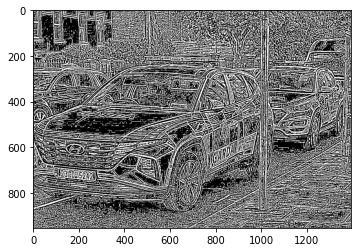

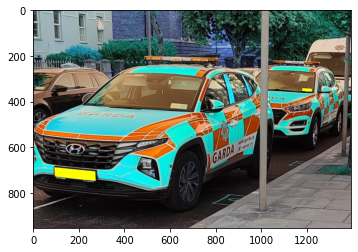

In [116]:
"""
This project aims to give the user the ability to input any sample images of car license plates
and return the results as a text output.

The product is capable of recognising car license plates rotated, as well as a certain amount of blurriness.

"""

# Input Image
I = cv2.imread("Sample Inputs/gardai_cars.jpg")

# Grayscale Image
G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Binarize Image
#_, B = cv2.threshold(G, 140, 255, cv2.THRESH_BINARY)
B = cv2.adaptiveThreshold(G, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 7, C = 0)


# Plate Localization
contours, hierarchy = cv2.findContours(image=B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

image_copy = cv2.cvtColor(I.copy(), cv2.COLOR_BGR2RGB)
#cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(255,0,0), thickness=5, lineType=cv2.LINE_AA)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    epsilon = 0.03 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # check 1 - No smaller than a standard plate 
    check_one = cv2.contourArea(contour) > (h*w/2)
    # check 2 - No larger than a standard plate
    check_two = cv2.contourArea(contour) < (h*w*2) 
    # check 4 - Too small to reliably extract text
    check_three = cv2.contourArea(contour) > 500
    # check 4 - Box found is sideways
    check_four = h < w
    
    total_checks = check_one and check_two and check_three and check_four
    
    if len(approx) == 4: 
        if (h*5.5) > w and (h*7) > w:
            if  total_checks:
                cv2.drawContours(image_copy, [approx], 0, (0, 255, 255), -1)


fig, args = plt.subplots(1, 1)
args.imshow(B, cmap="gray")
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
cv2.imwrite("g3.jpg", image_copy)
fig2, arg = plt.subplots(1, 1)
arg.imshow(image_copy)